In [23]:
def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    valpor = pd.DataFrame(data.nunique()/data.shape[0]*100,columns=['% de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val, valpor], axis=1)
    return mis_val_table

def creacion_tabla(x):
  tabla_x = mytable(x)
  print(x.shape)
  return tabla_x




*   Entregable: lista top de registro en OF
*   OF: juntar las palabras
*    prioridad  P
*    quitar memo de  personas
*    adicionar nivel 2
*    cualquier tema de los datos hablar con johan sebatian.
*     Trabajar sobre P



In [24]:
lista=['fgs_NumeroDocumContacto'	,'fgs_NombreCompletoContacto',
       'fgs_FechaInicio'	,'fgs_FechaFin',
       'fdp_FechaGestionActual',
       'fdp_FechaVencimientoGestionActual',
       'fdp_FechaVencimientoTotal']	
# varios indicadores de fechas

In [25]:
import pandas as pd

In [26]:
df_Registros_P = pd.read_csv('/content/Base_registros_extraida_OF.csv')

In [27]:
df_Registros_P.shape

(11224, 222)

In [28]:
df_Registros_P.columns

Index(['fgs_IdCampana', 'fgs_IdGestion', 'fgs_IdGestionDetalle',
       'fgs_NombreCampana', 'fgs_NombrePlataforma',
       'fgs_SiglasDocumentoContacto', 'fgs_NombreDocumentoContacto',
       'fgs_NumeroDocumContacto', 'fgs_NombreCompletoContacto',
       'fgs_FechaNacimientoContacto',
       ...
       'fgs_ObservacionEscalamientoN4', 'fdp_FechaEscalamientoN4',
       'fdp_FechaVencimientoEscalamientoN4', 'CodigoGrupoRolEscalamientoN4',
       'GrupoRolEscalamientoN4', 'fdp_MotivoEscalamientoN4',
       'fdp_NivelEscalamientoN4', 'T_Objetivo_EnNivel4', 'T_Real_EnNivel4',
       'Cumple_Objetivo_EnNivel4'],
      dtype='object', length=222)

In [29]:
df_Registros_P.head(2)

,fgs_IdCampana,fgs_IdGestion,fgs_IdGestionDetalle,fgs_NombreCampana,fgs_NombrePlataforma,fgs_SiglasDocumentoContacto,fgs_NombreDocumentoContacto,fgs_NumeroDocumContacto,fgs_NombreCompletoContacto,fgs_FechaNacimientoContacto,fgs_HabeasContacto,fgs_NombreGeneroContacto,fgs_RoutingPointOrVdn,fgs_Extension,fgs_CallId,fgs_Skill,fgs_Ani,fgs_Ip,fgs_OpcionesIVR,fgs_FechaInicio,fgs_FechaFin,fgs_IdTipificacionGestionDetalle,fgs_Tipificación,fgs_Nivel1,fgs_Nivel2,fgs_Nivel3,fgs_Nivel4,fgs_Nivel5,fgs_Nivel6,fgs_Nivel7,fgs_Nivel8,fgs_Nivel9,fgs_Nivel10,fgs_Direccion_01,fgs_BarrioDireccion_01,fgs_LocalidadDireccion_01,fgs_CiudadDireccion_01,fgs_DepartamentoDireccion_01,fgs_PaisDireccion_01,fgs_Telefono_01,...,T_Objetivo_Total,T_Real_Total,Cumple_Objetivo_Total,fdp_IdHistoricoPqrGestionActual,fdp_IdGrupoGestionActual,fdp_NombreGrupoGestionActual,fdp_IdDetalleFlujoGestionActual,fdp_IdUsuarioGestionActual,fdp_UsuarioGestionActual,fdp_NombreUsuarioGestionActual,fgs_ObservacionGestionActual,fdp_FechaGestionActual,fdp_FechaVencimientoGestionActual,CodigoGrupoRolGestionActual,GrupoRolGestionActual,fdp_MotivoGestionActual,fdp_NivelGestionActual,Ajustado,TipoAjuste,Valido,Pruebas,fdp_FechaVencimientoTotal,NoReprocesar,fdp_IdHistoricoPqrEscalamientoN4,fdp_IdGrupoEscalamientoN4,fdp_NombreGrupoEscalamientoN4,fdp_IdDetalleFlujoEscalamientoN4,fdp_IdUsuarioEscalamientoN4,fdp_UsuarioEscalamientoN4,fdp_NombreUsuarioEscalamientoN4,fgs_ObservacionEscalamientoN4,fdp_FechaEscalamientoN4,fdp_FechaVencimientoEscalamientoN4,CodigoGrupoRolEscalamientoN4,GrupoRolEscalamientoN4,fdp_MotivoEscalamientoN4,fdp_NivelEscalamientoN4,T_Objetivo_EnNivel4,T_Real_EnNivel4,Cumple_Objetivo_EnNivel4
0,12,14051976,1111309.0,Operaciones Financieras,Web,NIT,NaN,9003104584,METROOMAT NDT SAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.27.90.93,NaN,2021-03-01 06:08:30.000,2021-03-01 06:10:58.000,7367,Contacto,Cuentas por pagar,Recepción y contabilización facturas de provee...,Causación de facturas / Cockpit,Causación de facturas / Cockpit,NaN,NaN,NaN,NaN,NaN,NaN,CR 52 44 A 35,NaN,NaN,"BOGOTA, D.C.",BOGOTA,Colombia,8023687,...,NaN,NaN,NaN,4.0,0,Grupo Primer Nivel Operaciones Financieras,NaN,147.0,1.026290e+09,LAURA MAYERLY BOHORQUEZ GAMBA,Se informa que para poder dar respuesta a su r...,2021-03-01 06:10:58.000,2020-02-25 16:30:00.000,1.0,Asesor de Servicio Contact Center,NaN,Nivel1,True,Fecha Superior a la fecha de creación o Fecha ...,NaN,False,2021-03-01 09:45:00.000,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No Aplica
1,12,14052000,1111345.0,Operaciones Financieras,Web,NIT,NaN,9001358397,CGG SERVICES SUCUSAL COLOMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.27.90.93,NaN,2021-03-01 06:15:54.000,2021-03-01 06:27:09.000,7367,Contacto,Cuentas por pagar,Recepción y contabilización facturas de provee...,Causación de facturas / Cockpit,Causación de facturas / Cockpit,NaN,NaN,NaN,NaN,NaN,NaN,AV CR 45 108 A 50 P 6,NaN,NaN,"BOGOTA, D.C.",BOGOTA,Colombia,7430946,...,NaN,NaN,NaN,4.0,0,Grupo Primer Nivel Operaciones Financieras,NaN,103.0,1.012361e+09,JEIMY YOLIMA ARDILA PINZON,Se solicita filtro de seguridad,2021-03-01 06:27:09.000,2020-02-25 16:30:00.000,8.0,Asesor de Servicio BackOffice Contact Center,NaN,Nivel1,True,Fecha Superior a la fecha de creación o Fecha ...,NaN,False,2021-03-01 09:45:00.000,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No Aplica


In [30]:
filtro = df_Registros_P[lista]
filtro

,fgs_NumeroDocumContacto,fgs_NombreCompletoContacto,fgs_FechaInicio,fgs_FechaFin,fdp_FechaGestionActual,fdp_FechaVencimientoGestionActual,fdp_FechaVencimientoTotal
0,9003104584,METROOMAT NDT SAS,2021-03-01 06:08:30.000,2021-03-01 06:10:58.000,2021-03-01 06:10:58.000,2020-02-25 16:30:00.000,2021-03-01 09:45:00.000
1,9001358397,CGG SERVICES SUCUSAL COLOMBIA,2021-03-01 06:15:54.000,2021-03-01 06:27:09.000,2021-03-01 06:27:09.000,2020-02-25 16:30:00.000,2021-03-01 09:45:00.000
2,8908017835,SANCHO BBDO WORLDWIDE INC SA,2021-03-01 06:20:30.000,2021-03-01 06:28:06.000,2021-03-01 06:28:05.057,2021-03-08 07:30:00.000,2021-03-08 07:30:00.000
3,1000,CLIENTE ANONIMO ECOPETROL,2021-03-01 06:34:36.000,2021-03-01 06:42:28.000,2021-03-01 06:42:28.000,2020-02-25 16:30:00.000,2021-03-01 09:45:00.000
4,9005845366,UNION TEMPORAL SKANSKA - SAN ANTONI,2021-03-01 06:42:47.000,2021-03-01 06:55:41.000,2021-03-01 06:55:41.000,2020-02-25 16:30:00.000,2021-03-01 09:45:00.000
...,...,...,...,...,...,...,...
11219,9010422211,TOTALFLUIDOS S.A.S.,2020-12-31 10:31:35.000,2020-12-31 10:35:54.000,2020-12-31 10:35:54.000,2020-02-25 16:30:00.000,2020-12-31 12:50:54.000
11220,8300681793,POWER QUALITY SOLUTIONS DE,2020-12-31 11:17:45.000,2020-12-31 11:21:36.000,2020-12-31 11:21:36.000,2020-02-25 16:30:00.000,2020-12-31 13:36:36.000
11221,8909119722,SEGURIDAD RECORD DE COLOMBIA LIMITADA SEGURCOL,2020-12-31 11:39:29.000,2020-12-31 11:41:17.000,2020-12-31 11:41:17.000,2020-02-25 16:30:00.000,2020-12-31 13:56:17.000
11222,9012179488,ED ENERGY SAS,2020-12-31 15:16:56.000,2020-12-31 15:19:25.000,2020-12-31 15:19:25.000,2020-02-25 16:30:00.000,2021-01-04 08:34:00.000


In [31]:
creacion_tabla(filtro)

(11224, 7)


,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes,% de valores diferentes
fgs_NumeroDocumContacto,0.000000,0.0,int64,2105,18.754455
fgs_NombreCompletoContacto,0.000000,0.0,object,2047,18.237705
fgs_FechaInicio,0.000000,0.0,object,11209,99.866358
fgs_FechaFin,0.000000,0.0,object,11219,99.955453
fdp_FechaGestionActual,0.000000,0.0,object,11219,99.955453
fdp_FechaVencimientoGestionActual,0.071276,0.0,object,742,6.610834
fdp_FechaVencimientoTotal,0.000000,0.0,object,9178,81.771205


In [32]:
counts = filtro['fgs_NumeroDocumContacto'].value_counts().sort_values(ascending=False)
final = counts.reset_index().rename(columns={"index":"ID","fgs_NumeroDocumContacto":"Frecuencia"})
final["Porcentaje del total de datos"]=final['Frecuencia']/df_Registros_P.shape[0]*100
final['ID']=final['ID'].astype('O')
final

,ID,Frecuencia,Porcentaje del total de datos
0,1000,198,1.764077
1,8001841959,158,1.407698
2,9003005431,119,1.060228
3,8901101887,93,0.828582
4,100,71,0.632573
...,...,...,...
2100,8001520390,1,0.008909
2101,80409256,1,0.008909
2102,192539291,1,0.008909
2103,830116500,1,0.008909


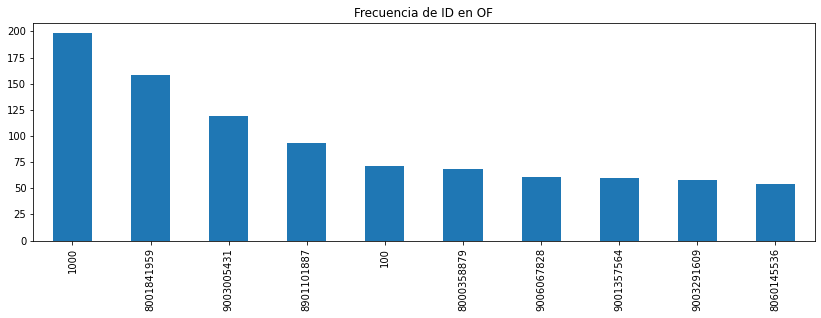

In [33]:
counts[:10].plot.bar(figsize =(14,4), title="Frecuencia de ID en OF")

In [34]:

filtro.groupby('fgs_NumeroDocumContacto').sum()

,fgs_NombreCompletoContacto,fgs_FechaInicio,fgs_FechaFin,fdp_FechaGestionActual,fdp_FechaVencimientoTotal
fgs_NumeroDocumContacto,,,,,
100,AnonimoAnonimoAnonimoAnonimoAnonimoAnonimoAnon...,2021-03-01 11:28:41.0002021-03-01 14:18:58.000...,2021-03-01 11:43:50.0002021-03-01 14:25:09.000...,2021-03-01 11:43:50.0002021-03-01 14:25:09.000...,2021-03-01 13:58:50.0002021-03-02 07:40:00.000...
1000,CLIENTE ANONIMO ECOPETROL CLIENTE ANONIMO ECOP...,2021-03-01 06:34:36.0002021-03-03 06:15:54.000...,2021-03-01 06:42:28.0002021-03-03 06:37:46.000...,2021-03-01 06:42:28.0002021-03-03 06:37:46.000...,2021-03-01 09:45:00.0002021-03-03 09:45:00.000...
10000,SEM INGENIERIA LTDA SEM INGENIERIA LTDA SEM IN...,2021-02-23 06:07:39.0002020-09-01 07:47:19.000...,2021-02-23 06:11:19.0002020-09-01 07:49:00.000...,2021-02-23 06:11:19.0002020-09-01 07:49:00.000...,2021-02-23 09:45:00.0002020-09-01 10:04:00.000...
25995,OIL COMPANIES INTERNATIONALOIL COMPANIES INTER...,2021-04-27 10:38:51.0002021-04-30 09:12:50.000,2021-04-27 10:41:31.0002021-04-30 09:20:25.000,2021-04-27 10:41:31.0002021-04-30 09:20:25.000,2021-04-27 12:56:31.0002021-04-30 11:35:25.000
100000,ANONIMOANONIMOANONIMOANONIMO,2020-09-25 06:04:53.0002020-09-30 10:57:37.000...,2020-09-25 06:08:25.0002020-09-30 11:01:08.000...,2020-09-25 06:08:25.0002020-09-30 11:01:08.000...,2020-09-25 09:45:00.0002020-09-30 13:16:08.000...
...,...,...,...,...,...
822612500014,ICTS GLOBAL SERVICOS DE,2021-03-01 09:57:53.000,2021-03-01 10:06:57.000,2021-03-01 10:06:57.000,2021-03-01 12:21:57.000
6232145938440,THE WOODHOUSE PARTNERSHIP LTD,2021-05-20 07:14:06.000,2021-05-20 07:17:44.000,2021-05-20 07:17:44.000,2021-05-20 09:45:00.000
7586419300001,Z-TERRA NORTH INC,2020-12-09 12:24:06.000,2020-12-09 12:31:03.000,2020-12-09 12:31:03.000,2020-12-09 14:46:03.000


In [35]:
final.to_excel('Top_ID_en_registros_para_OF.xlsx')